# Importance Weights analysis

### 1 - Import Data

In [2]:
import os
import numpy as np
import pandas as pd
import json



In [3]:
os.chdir('..')

In [47]:
sim_path = '../results/synth_classification_fixed_dataset_and_samples/29-04-2023-18:13'

In [48]:
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

runs_dirs = get_immediate_subdirectories(sim_path)

In [49]:
true_weights_list = []
pre_AL_weights_list = []

uncertainty_spreading_weights = {}
first_K_sampling_weights = {}
random_sampling_weights = {}

STRATEGIES = [
    "RandomSampling",
    "UncertaintySpreading"
]

for run in runs_dirs:
    with open(sim_path + '/'+ run +'/true_weights.json', 'r') as f:
        true_weights_list.append(json.load(f))

    with open(sim_path + '/'+ run +'/pre_AL_weights.json', 'r') as f:
        pre_AL_weights_list.append(json.load(f))

    with open(sim_path + '/'+ run +'/metadata.json', 'r') as f:
        metadata = json.load(f)

    for strategy in STRATEGIES:

        strategy_path = sim_path + '/' + run + '/' + strategy

        for n in range(metadata['n_samples']):

            n_sample = n + 1

            with open(strategy_path + '/' + str(n_sample) + '_samples.json', 'r') as f:

                if strategy == "RandomSampling":
                    random_sampling_weights[n_sample] = json.load(f)

                elif strategy == "UncertaintySpreading":
                    uncertainty_spreading_weights[n_sample] = json.load(f)

                elif strategy == "FirstKSampling":
                    first_K_sampling_weights[n_sample] = json.load(f)

In [50]:
uncertainty_spreading_weights.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

### Compute MAE

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
mae_us = {}
for key in uncertainty_spreading_weights.keys():
    mae_us[key] = mean_absolute_error(true_weights_list[0], uncertainty_spreading_weights[key])


In [53]:
mae_rs = {}
for key in random_sampling_weights.keys():
    mae_rs[key] = mean_absolute_error(true_weights_list[0], random_sampling_weights[key])

### Plot Results

In [54]:
import matplotlib.pyplot as plt

In [55]:
list(mae_rs.keys()), list(mae_rs.values())

([1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100],
 [0.200944134721827,
  0.20355631275647335,
  0.19565413679325275,
  0.19698357797982086,
  0.20167832521131301,
  0.2014460257134426,
  0.200853720865513,
  0.20739325090979155,
  0.20783320657248436,
  0.20509660960806697,
  0.2038444266763983,
  0.2029211724878611,
  0.20584410206353915,
  0.20925380399465102,
  0.22614472070733252,
  0.2275281657572062,
  0.22482811084745785,
  0.22334477025981347,
 

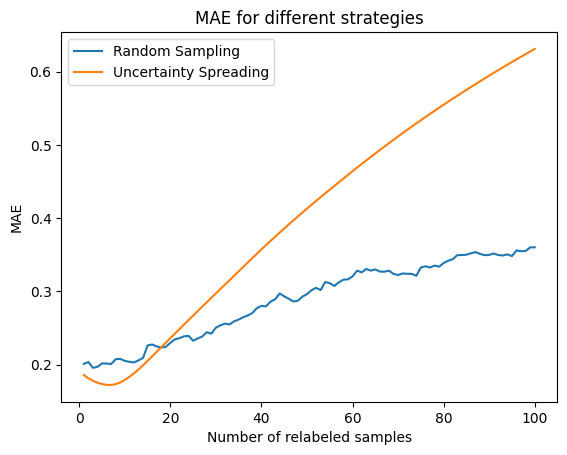

In [57]:
# create a new figure and axis object
fig, ax = plt.subplots()

# plot the MAE values for each model as a line
ax.plot(list(mae_rs.keys()), list(mae_rs.values()), label='Random Sampling')
ax.plot(list(mae_us.keys()),list(mae_us.values()), label='Uncertainty Spreading')

# add a legend to the plot
ax.legend()

# set the x-axis label
ax.set_xlabel('Number of relabeled samples')

# set the y-axis label
ax.set_ylabel('MAE')

# set the title of the plot
ax.set_title('MAE for different strategies')

# display the plot
plt.show()
